Kaggle link: https://www.kaggle.com/code/yamanizm/personal-loan-eda-ml-98-iamdatamonkey/data

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
df = pd.read_csv('bank_data.csv')

In [75]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [76]:
df.shape

(5000, 14)

In [77]:
# Here ID and ZIP code is of no use
df.drop(['ID', 'ZIP Code'], axis= 1, inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## Checking Misssing values

In [78]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

- There is no missing values

## Checking outliers using IQR(interquartile range)

In [79]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


(None, (5000, 12))

In [80]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [81]:
def remove_outlier(df, features): # using IQR method
    new_df = df.copy()
    for f in features:
        # First quartile
        q1 = np.percentile(new_df[f], 25)
        
        # Second quartile
        q3 = np.percentile(new_df[f], 75)
        
        # iqr => Inter quratile range
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
            
            
        new_df[f] = new_df[(new_df[f] >= lower_bound) & (new_df[f] <= upper_bound)][f]
        return new_df

In [82]:
df = remove_outlier(df, df.columns)

In [83]:
df.head() , df.shape

(   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
 0   25           1      49       4    1.6          1         0              0   
 1   45          19      34       3    1.5          1         0              0   
 2   39          15      11       1    1.0          1         0              0   
 3   35           9     100       1    2.7          2         0              0   
 4   35           8      45       4    1.0          2         0              0   
 
    Securities Account  CD Account  Online  CreditCard  
 0                   1           0       0           0  
 1                   1           0       0           0  
 2                   0           0       0           0  
 3                   0           0       0           0  
 4                   0           0       0           1  ,
 (5000, 12))

# EDA

In [84]:
features = df.columns

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


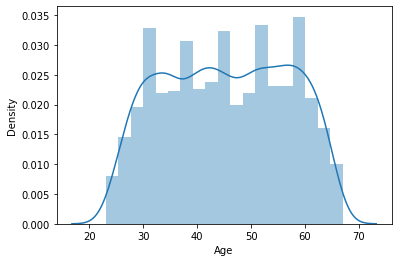

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


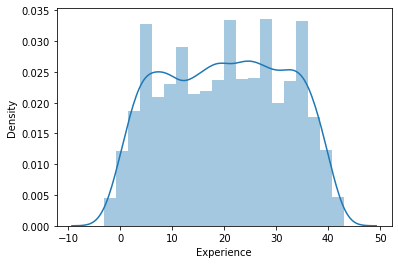

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


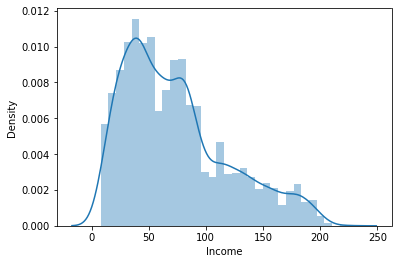

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


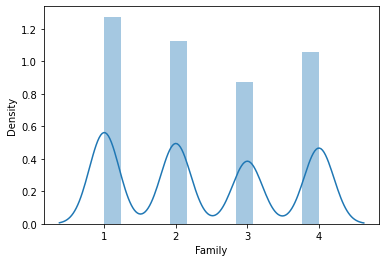

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


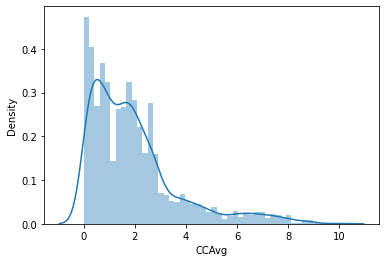

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


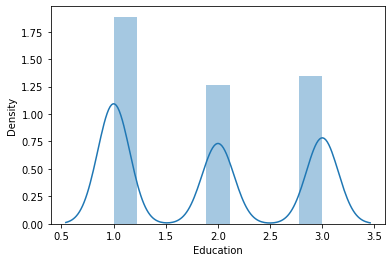

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


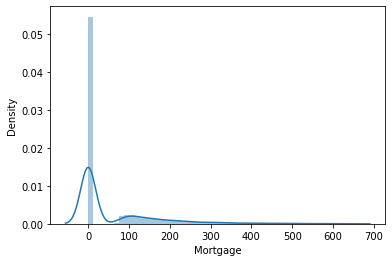

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


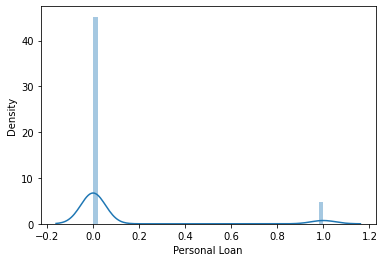

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


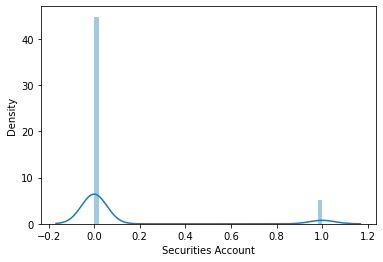

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


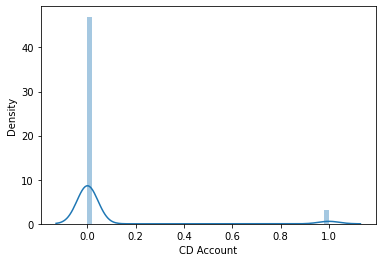

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


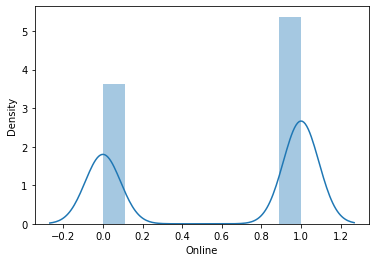

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


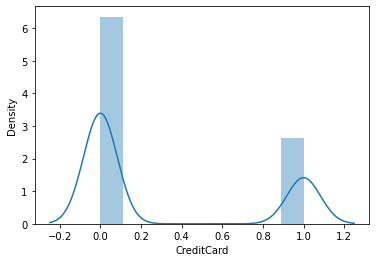

In [85]:
def distplot(df, features):
    for f in features:
        sns.distplot(df[f])
        plt.show()
distplot(df, features=features)

In [86]:
df['Personal Loan'].value_counts() # Here it an imbalanced target data

0    4520
1     480
Name: Personal Loan, dtype: int64

In [87]:
# probablity of 1 over 0 is
480/(480 + 4520) * 100 # more than 90% of result will be for 0 only 9.6% for 1

9.6

# Correlation

<AxesSubplot:>

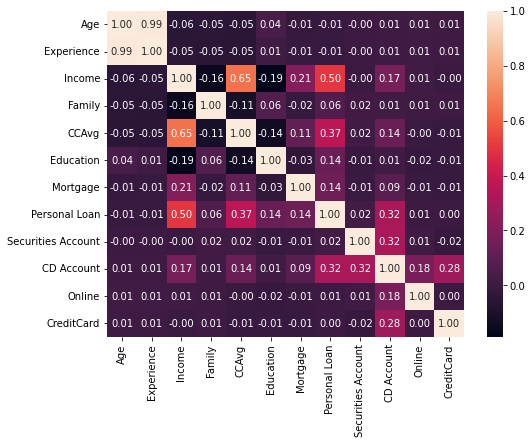

In [88]:
df_corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot = True, fmt = '1.2f')

### Age

<AxesSubplot:xlabel='Personal Loan', ylabel='Age'>

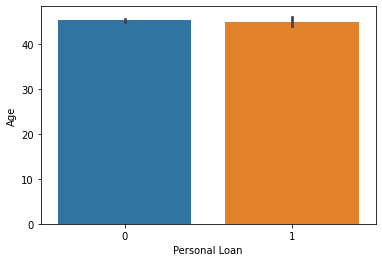

In [89]:
# Age
sns.barplot(x='Personal Loan', y='Age', data = df)

In [90]:
df['Age_Grp'] = [0 if i < 35 else 1 if i >= 35 and i < 55 else 2 for i in df['Age']]

<AxesSubplot:xlabel='Age_Grp', ylabel='Age'>

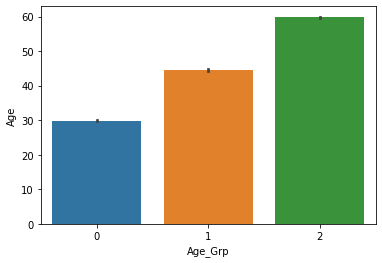

In [91]:
sns.barplot(x='Age_Grp', y='Age', data = df)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_Grp', ylabel='Density'>

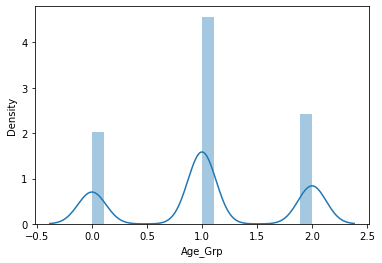

In [92]:
sns.distplot(df['Age_Grp'])

- Now looks some Good distribution

In [93]:
# df.drop('Age', axis = 1, inplace = True)

In [94]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age_Grp
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,1
2,39,15,11,1,1.0,1,0,0,0,0,0,0,1
3,35,9,100,1,2.7,2,0,0,0,0,0,0,1
4,35,8,45,4,1.0,2,0,0,0,0,0,1,1


## Exprience

<AxesSubplot:xlabel='Personal Loan', ylabel='Experience'>

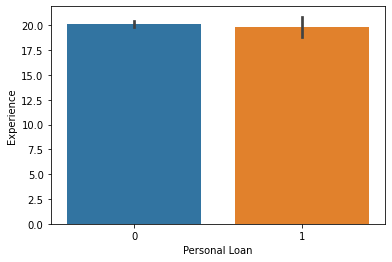

In [95]:
sns.barplot(x='Personal Loan', y='Experience', data  = df)

In [96]:
df['Experience_Grp'] = [0 if i < 15 else 1 if i >= 15 and i < 30 else 2 for i in df['Experience']]

<AxesSubplot:xlabel='Experience', ylabel='Personal Loan'>

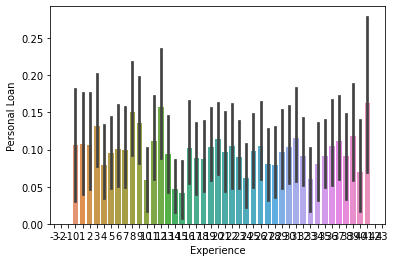

In [97]:
sns.barplot(x='Experience', y='Personal Loan', data = df)

## Income

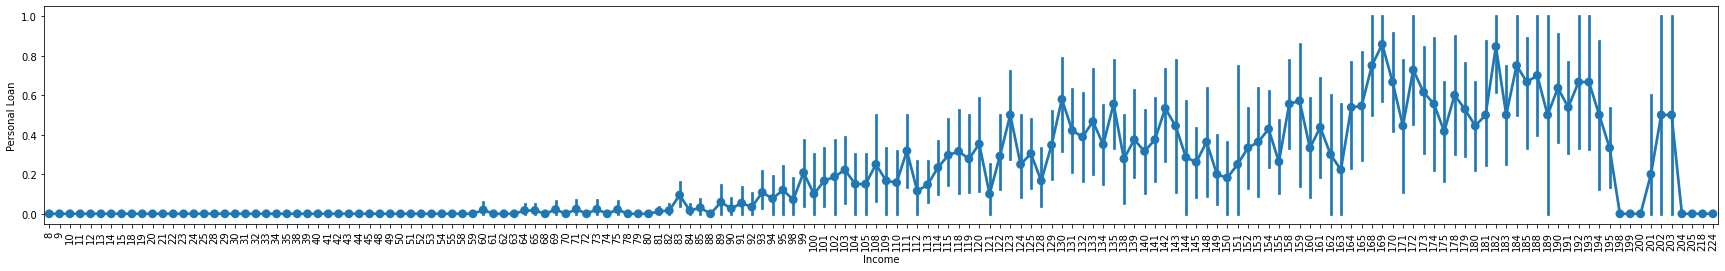

In [98]:
plt.figure(figsize=(30, 4))
sns.pointplot(x='Income', y='Personal Loan', data = df)
plt.xticks(rotation = 90)
plt.show()

In [99]:
df['Income_Grp'] = [0 if i < 100 else 1 for i in df['Income']]

<AxesSubplot:xlabel='Income_Grp', ylabel='Personal Loan'>

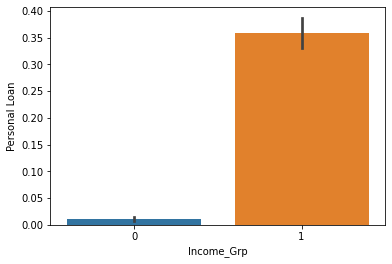

In [100]:
sns.barplot(x='Income_Grp', y='Personal Loan', data = df)

## Family

In [101]:
df['Family'].unique()

array([4, 3, 1, 2], dtype=int64)

<AxesSubplot:xlabel='Family', ylabel='Personal Loan'>

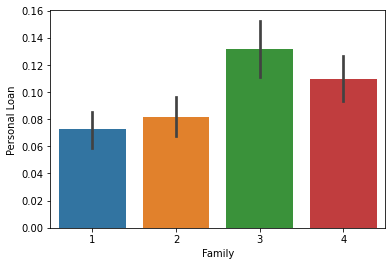

In [102]:
sns.barplot(x='Family',y='Personal Loan', data = df)

In [103]:
df['Family_Grp'] = [0 if i < 3 else 1 for i in df['Family']]

In [104]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Age_Grp', 'Experience_Grp', 'Income_Grp',
       'Family_Grp'],
      dtype='object')

## CCAvg

In [105]:
df['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

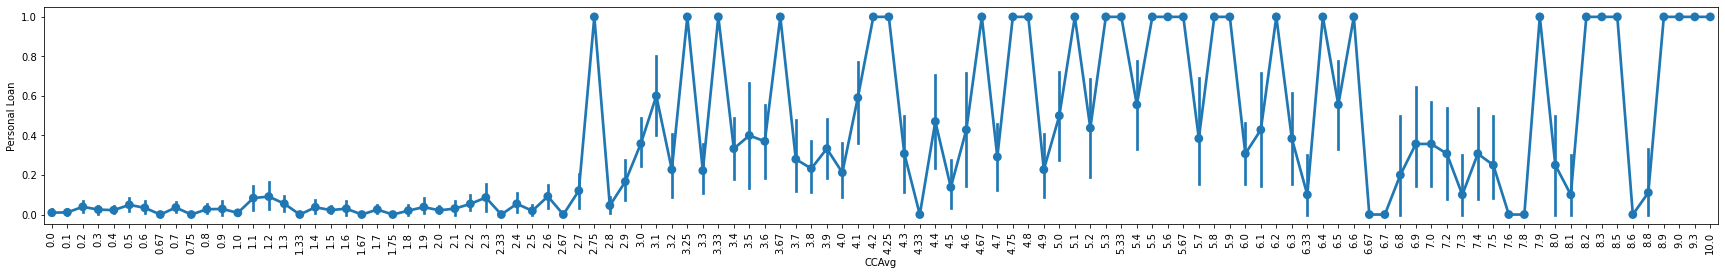

In [106]:
plt.figure(figsize=(30, 4))
plt.tight_layout()
plt.xticks(rotation = 90)
sns.pointplot(x='CCAvg', y='Personal Loan', data = df)
plt.show()

In [107]:
df['CCAvg_Grp'] = [0 if i < 2.75 else 1 for i in df['CCAvg']]

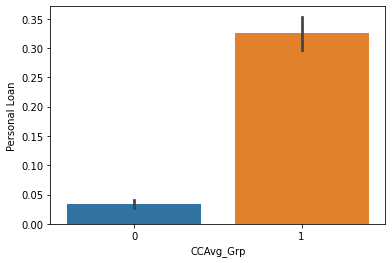

In [108]:
sns.barplot(x='CCAvg_Grp', y='Personal Loan', data = df);

## Education

In [109]:
df['Education'].unique()

array([1, 2, 3], dtype=int64)

<AxesSubplot:xlabel='Education', ylabel='Personal Loan'>

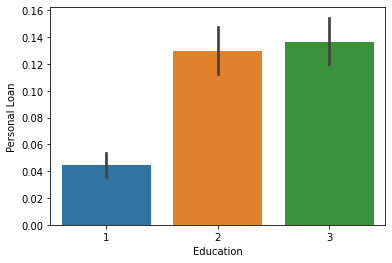

In [110]:
sns.barplot(x='Education', y='Personal Loan', data = df)

In [111]:
df['Education_Grp'] = [0 if i < 2 else 1 for i in df['Education']]

<AxesSubplot:xlabel='Education_Grp', ylabel='Personal Loan'>

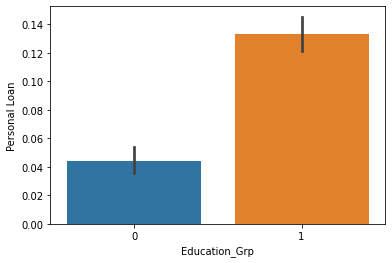

In [112]:
sns.barplot(x='Education_Grp', y='Personal Loan', data = df)

## Mortgage

In [113]:
# Mortgage refers to the process of offering something as a guarantee or collateral against a loan.
# One may come across the term when looking for secured loans. Generally,
# home loans of all types are secured loans. The borrower must offer their property as a security to the lender.
df['Mortgage_Grp'] = [0 if i == 0 else 1 for i in df['Mortgage']]

<AxesSubplot:xlabel='Mortgage_Grp', ylabel='Personal Loan'>

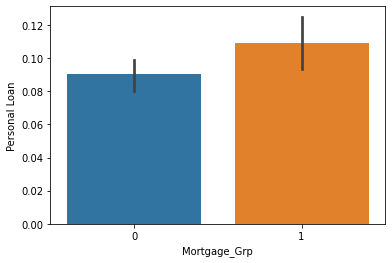

In [114]:
sns.barplot(x='Mortgage_Grp', y='Personal Loan', data = df)

In [115]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Age_Grp', 'Experience_Grp', 'Income_Grp',
       'Family_Grp', 'CCAvg_Grp', 'Education_Grp', 'Mortgage_Grp'],
      dtype='object')

## Securities Account

In [116]:
# From distributon plot it looks biased data
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [117]:
df.drop('Securities Account', axis =1, inplace = True)

## CD Account

In [118]:
# It is also a biased data
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [119]:
df.drop('CD Account', axis = 1, inplace = True)

In [120]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Online', 'CreditCard', 'Age_Grp',
       'Experience_Grp', 'Income_Grp', 'Family_Grp', 'CCAvg_Grp',
       'Education_Grp', 'Mortgage_Grp'],
      dtype='object')

## Online

<AxesSubplot:xlabel='Online', ylabel='Personal Loan'>

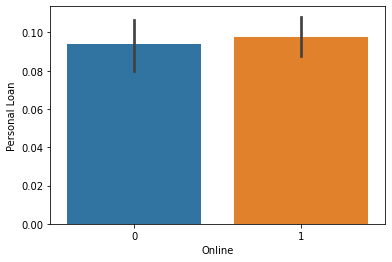

In [121]:
sns.barplot(x='Online', y='Personal Loan', data = df)

## CreditCard

<AxesSubplot:xlabel='CreditCard', ylabel='Personal Loan'>

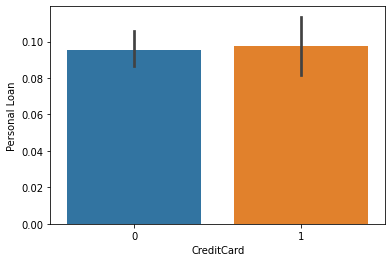

In [122]:
sns.barplot(x='CreditCard', y='Personal Loan', data = df)

## Drop unnecessary columns

In [188]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Online', 'CreditCard', 'Age_Grp',
       'Experience_Grp', 'Income_Grp', 'Family_Grp', 'CCAvg_Grp',
       'Education_Grp', 'Mortgage_Grp'],
      dtype='object')

In [191]:
final_df = df.drop(['Experience','Income', 'Family', 'CCAvg', 'Education', 'Mortgage','Age'], axis= 1)
# final_df = df

In [192]:
final_df = pd.get_dummies(data = final_df, columns=['Age_Grp', 'Experience_Grp'])

In [193]:
final_df.head()

,Personal Loan,Online,CreditCard,Income_Grp,Family_Grp,CCAvg_Grp,Education_Grp,Mortgage_Grp,Age_Grp_0,Age_Grp_1,Age_Grp_2,Experience_Grp_0,Experience_Grp_1,Experience_Grp_2
0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,0,0,1,0,1,0,1,0,0,1,0,1,0,0


# Train Test split

In [194]:
X = final_df.drop('Personal Loan', axis = 1)
y = final_df['Personal Loan']

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [197]:
# Now Scale the data

In [198]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [199]:
scale.fit(X_train)

StandardScaler()

In [200]:
scaled_X_train = scale.transform(X_train)
scaled_X_test = scale.transform(X_test)

In [201]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(var_smoothing=1.0)

In [202]:
model.fit(scaled_X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [203]:
model.score(scaled_X_train, y_train)

0.9354285714285714

In [204]:
model.score(scaled_X_test, y_test)

0.924

In [205]:
from sklearn.metrics import confusion_matrix, classification_report

In [206]:
confusion_matrix(y_test, model.predict(scaled_X_test))

array([[1342,    1],
       [ 113,   44]], dtype=int64)

In [207]:
print(classification_report(y_test, model.predict(scaled_X_test)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1343
           1       0.98      0.28      0.44       157

    accuracy                           0.92      1500
   macro avg       0.95      0.64      0.70      1500
weighted avg       0.93      0.92      0.90      1500



In [208]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(scaled_X_test))

0.924

In [209]:
print("Completed")

Completed
